In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hn = pd.read_csv("news_posts.csv", parse_dates=["created_at"])

In [3]:
hn

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,2016-08-04 11:52:00
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,2016-01-26 19:30:00
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,2016-06-23 22:20:00
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,2016-06-17 00:01:00
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,2015-09-30 04:12:00
...,...,...,...,...,...,...,...
20095,12379592,How Purism Avoids Intels Active Management Tec...,https://puri.sm/philosophy/how-purism-avoids-i...,10,6,AdmiralAsshat,2016-08-29 02:22:00
20096,10339284,YC Application Translated and Broken Down,https://medium.com/@zreitano/the-yc-applicatio...,4,1,zreitano,2015-10-06 14:57:00
20097,10824382,Microkernels are slow and Elvis didn't do no d...,http://blog.darknedgy.net/technology/2016/01/0...,169,132,vezzy-fnord,2016-01-02 00:49:00
20098,10739875,How Product Hunt really works,https://medium.com/@benjiwheeler/how-product-h...,695,222,brw12,2015-12-15 19:32:00


In [21]:
ask_bol = hn["title"].str.lower().str.startswith("ask hn")
ask_bol

0        False
1        False
2        False
3        False
4        False
         ...  
20095    False
20096    False
20097    False
20098    False
20099    False
Name: title, Length: 20100, dtype: bool

In [22]:
show_bol = hn["title"].str.lower().str.startswith("show hn")
show_bol

0        False
1        False
2        False
3        False
4        False
         ...  
20095    False
20096    False
20097    False
20098    False
20099    False
Name: title, Length: 20100, dtype: bool

In [6]:
ask_posts = hn[ask_bol].copy()

In [7]:
show_posts = hn[show_bol].copy()

In [8]:
other_posts = hn[~ (ask_bol | show_bol)]  # ~ not, | or 

In [9]:
ask_avg_com = ask_posts["num_comments"].mean()

In [10]:
show_avg_com = show_posts["num_comments"].mean()

In [11]:
print(ask_avg_com, show_avg_com)

14.038417431192661 10.31669535283993


In [12]:
avg_com = pd.Series({"ask_com":ask_avg_com, "show_com":show_avg_com})     #making a series to make a bar chart

In [13]:
avg_com

ask_com     14.038417
show_com    10.316695
dtype: float64

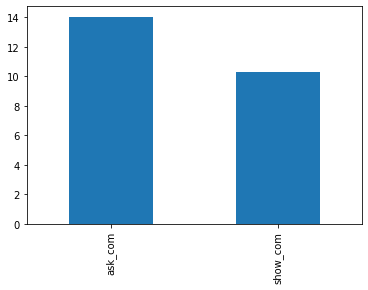

In [14]:
avg_com.plot.bar()

In [15]:
ask_posts["hours"] = ask_posts["created_at"].dt.hour # to return hours

In [16]:
ask_posts.head()

,id,title,url,num_points,num_comments,author,created_at,hours
7,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,2016-08-16 09:55:00,9
17,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,2015-11-22 13:43:00,13
22,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,2016-05-02 10:14:00,10
30,12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130,2016-08-02 14:20:00,14
31,10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak,2015-10-15 16:38:00,16


In [17]:
ask_posts.groupby("hours")["num_comments"].mean().sort_values(ascending = False)

hours
15    38.594828
2     23.810345
20    21.525000
16    16.796296
21    16.009174
13    14.741176
10    13.440678
14    13.233645
18    13.201835
17    11.460000
1     11.383333
11    11.051724
19    10.800000
8     10.250000
5     10.086957
12     9.410959
6      9.022727
0      8.127273
23     7.985294
7      7.852941
3      7.796296
4      7.170213
22     6.746479
9      5.577778
Name: num_comments, dtype: float64

In [18]:
show_posts["hours"] = show_posts["hours"] = show_posts["created_at"].dt.hour

In [19]:
show_posts.head()

,id,title,url,num_points,num_comments,author,created_at,hours
13,10627194,Show HN: Wio Link ESP8266 Based Web of Things...,https://iot.seeed.cc,26,22,kfihihc,2015-11-25 14:03:00,14
39,10646440,Show HN: Something pointless I made,http://dn.ht/picklecat/,747,102,dhotson,2015-11-29 22:46:00,22
46,11590768,"Show HN: Shanhu.io, a programming playground p...",https://shanhu.io,1,1,h8liu,2016-04-28 18:05:00,18
84,12178806,Show HN: Webscope Easy way for web developers...,http://webscopeapp.com,3,3,fastbrick,2016-07-28 07:11:00,7
97,10872799,Show HN: GeoScreenshot Easily test Geo-IP bas...,https://www.geoscreenshot.com/,1,9,kpsychwave,2016-01-09 20:45:00,20


In [20]:
show_posts.groupby("hours")["num_comments"].mean().sort_values(ascending=False)

hours
18    15.770492
0     15.709677
14    13.441860
23    12.416667
22    12.391304
12    11.803279
16    11.655914
7     11.500000
11    11.159091
3     10.629630
20    10.200000
19     9.800000
17     9.795699
9      9.700000
13     9.555556
4      9.500000
6      8.875000
1      8.785714
10     8.250000
15     8.102564
21     5.787234
8      4.852941
2      4.233333
5      3.052632
Name: num_comments, dtype: float64